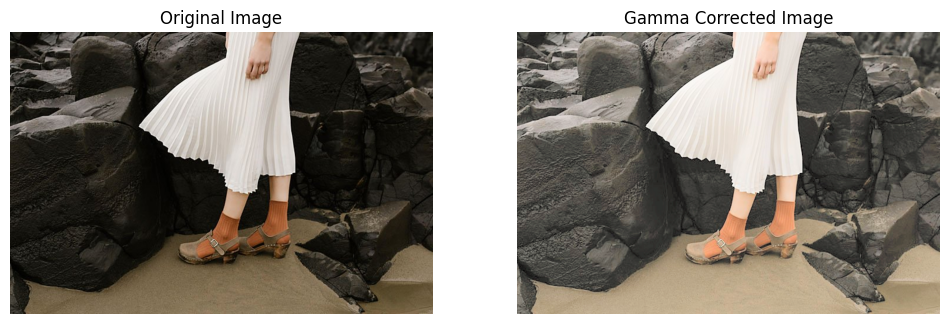

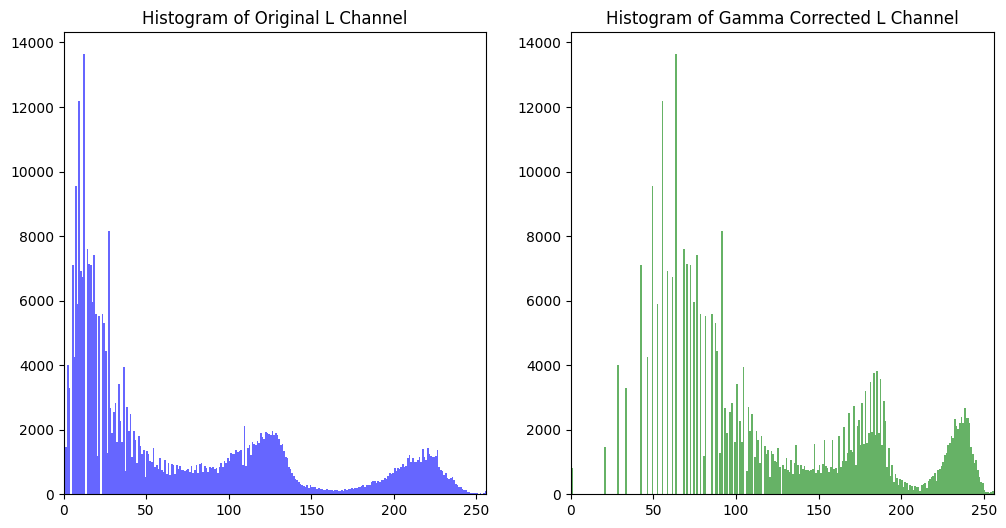

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_path = 'utils/highlights_and_shadows.jpg'
image = cv2.imread(image_path)

# Convert the image from BGR to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Extract the L channel (which corresponds to lightness)
L_channel, A_channel, B_channel = cv2.split(lab_image)

# Define the gamma value for correction (let's assume gamma=2.2)
gamma = 2.2

# Create a lookup table for gamma correction
# Formula: Output = 255 * (Input/255)^(1/gamma)
gamma_LUT = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in range(256)]).astype("uint8")

# Apply gamma correction to the L channel using LUT
L_gamma_corrected = cv2.LUT(L_channel, gamma_LUT)

# Merge the corrected L channel back with A and B channels
lab_gamma_corrected = cv2.merge((L_gamma_corrected, A_channel, B_channel))

# Convert the LAB image back to BGR color space
image_gamma_corrected = cv2.cvtColor(lab_gamma_corrected, cv2.COLOR_LAB2BGR)

# Plot the original and gamma-corrected images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image in RGB format (since OpenCV loads in BGR)
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
axes[0].imshow(original_image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Gamma-corrected image in RGB format
gamma_corrected_image_rgb = cv2.cvtColor(image_gamma_corrected, cv2.COLOR_BGR2RGB)
axes[1].imshow(gamma_corrected_image_rgb)
axes[1].set_title("Gamma Corrected Image")
axes[1].axis('off')

plt.show()

# Now let's compute and display the histograms for the L channel
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original L channel histogram
axes[0].hist(L_channel.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.6)
axes[0].set_title("Histogram of Original L Channel")
axes[0].set_xlim([0, 256])

# Gamma corrected L channel histogram
axes[1].hist(L_gamma_corrected.ravel(), bins=256, range=(0, 256), color='green', alpha=0.6)
axes[1].set_title("Histogram of Gamma Corrected L Channel")
axes[1].set_xlim([0, 256])

plt.show()